1️⃣ What factors influenced survival rates the most?

2️⃣ Does passenger class affect survival?

3️⃣ Are women and children more likely to survive?

4️⃣ How does fare price relate to survival?

5️⃣ Are there patterns in missing data?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [6]:
from google.colab import files
uploaded_file = files.upload()

Saving titanic.csv to titanic.csv


In [7]:
df = pd.read_csv('titanic.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [9]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [16]:
df.describe(include = object)

,Name,Sex
count,887,887
unique,887,2
top,Mr. Owen Harris Braund,male
freq,1,573


In [10]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [11]:
df.tail(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [12]:
df.shape

(887, 8)

In [13]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


In [14]:
df.duplicated().sum()

0

In [17]:
# What factor is the most influential on survival?
# Age or Sex or class/Fare Price matter to survival?
# Which gender are on high class or low class?


In [23]:
categorial_features = df.select_dtypes(include =object).columns.tolist()
categorial_features

['Name', 'Sex']

In [27]:
numerical_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_features

['Survived',
 'Pclass',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [46]:
import matplotlib.pyplot as plt

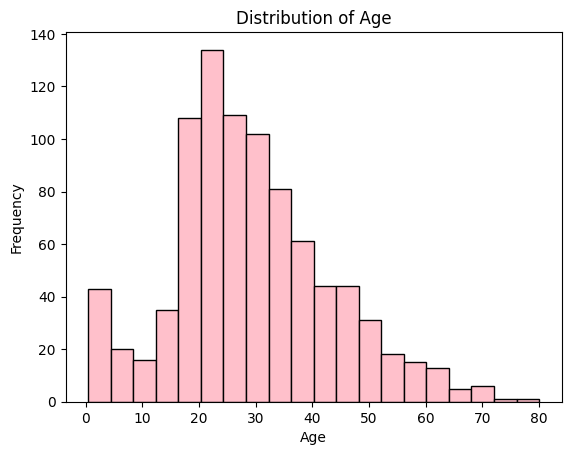

In [65]:
plt.hist(df['Age'], bins = 20, color = 'pink',edgecolor ="black")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

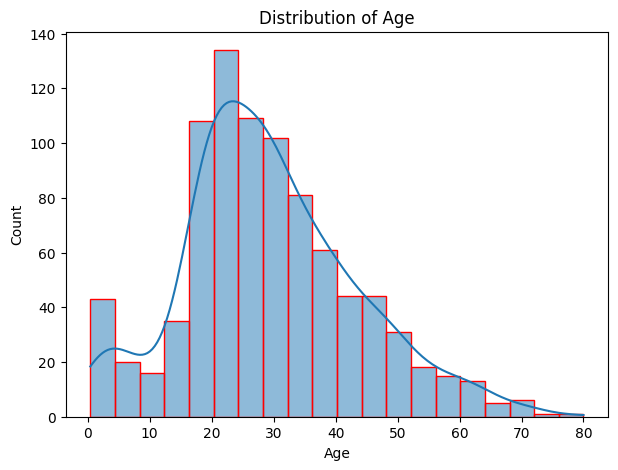

In [78]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], bins = 20, kde = True, edgecolor = 'red')
plt.title("Distribution of Age")
plt.show()

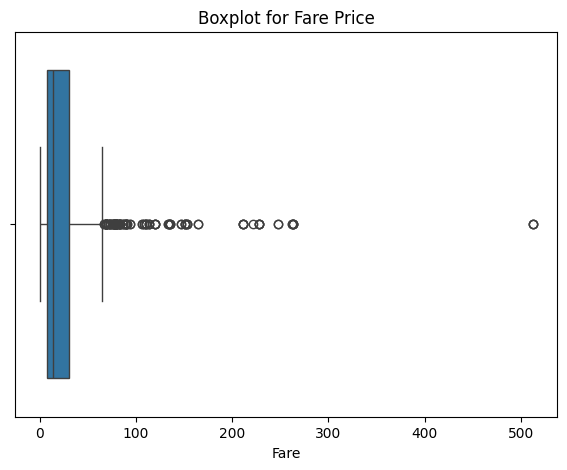

In [79]:
plt.figure(figsize =(7,5))
sns.boxplot( x = df['Fare'])
plt.title("Boxplot for Fare Price")
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

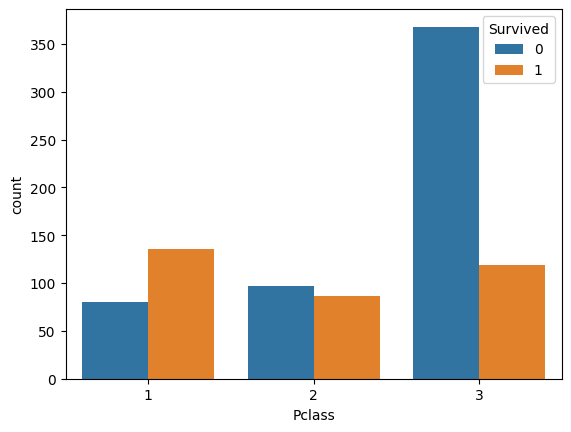

In [80]:
sns.countplot(x ='Pclass', hue ='Survived', data = df)

<Axes: xlabel='Sex', ylabel='count'>

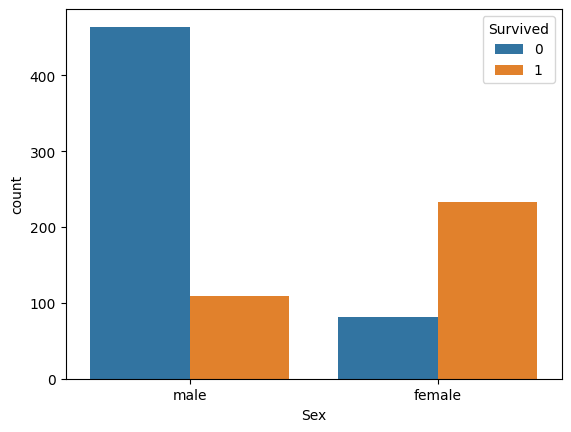

In [84]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df)

In [86]:
df_cleaned = df.drop(columns= ['Name', 'Sex'])

In [87]:
df_cleaned

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000
883,1,1,19.0,0,0,30.0000
884,0,3,7.0,1,2,23.4500
885,1,1,26.0,0,0,30.0000


<Axes: >

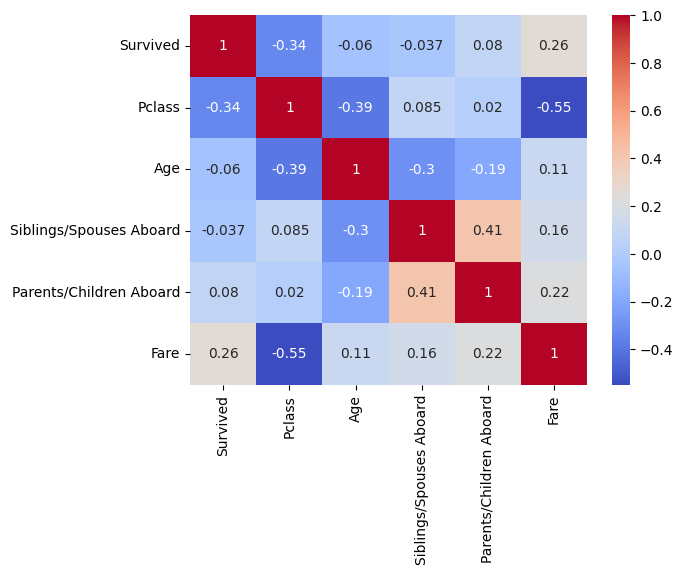

In [88]:
correlation = df_cleaned.corr()
sns.heatmap(correlation, annot = True, cmap = "coolwarm")

<Axes: xlabel='Pclass', ylabel='Survived'>

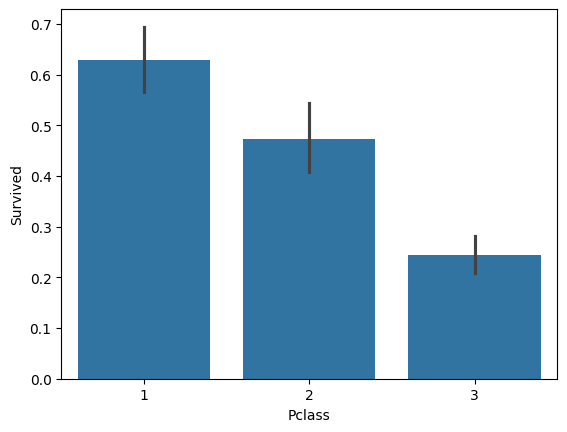

In [96]:
sns.barplot(x="Pclass", y="Survived", data=df)

<Axes: xlabel='Pclass', ylabel='Fare'>

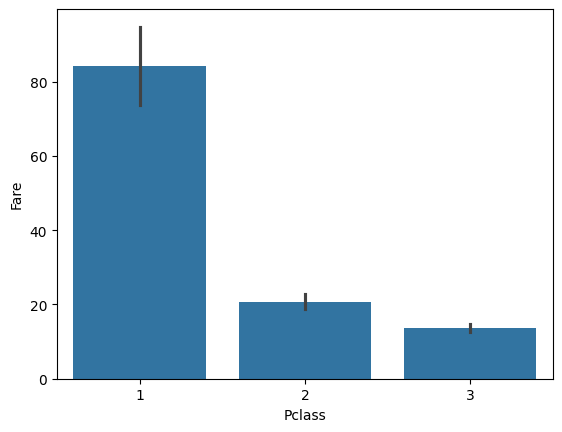

In [100]:
sns.barplot(x = "Pclass", y = "Fare", data = df)

In [104]:
df.groupby('Sex')['Survived'].mean()


,Survived
Sex,
female,0.742038
male,0.190227


In [103]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.244353


<Axes: xlabel='Sex', ylabel='Survived'>

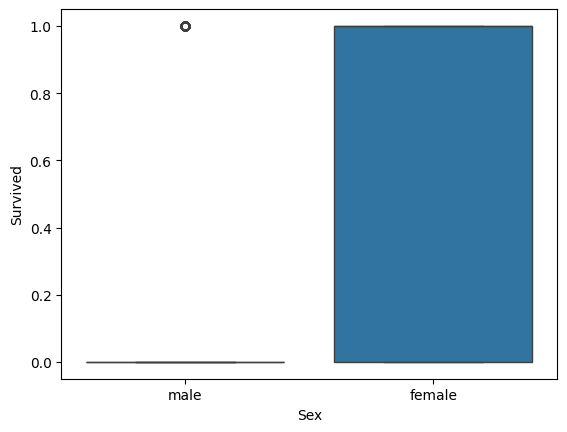

In [106]:
sns.boxplot(x ='Sex', y = 'Survived', data =df)

<Axes: xlabel='Sex', ylabel='count'>

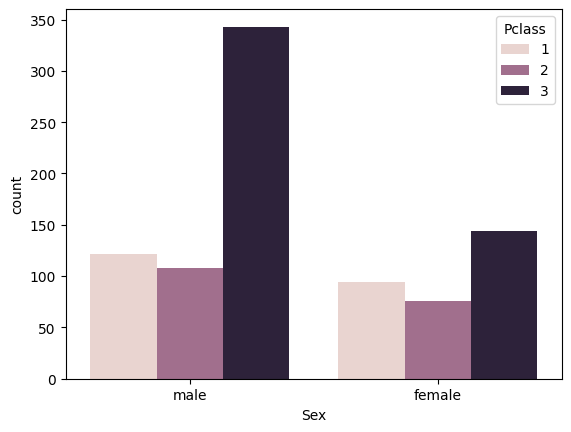

In [108]:
sns.countplot( x = 'Sex', hue ='Pclass', data =df)

In [ ]:
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, label="Survived")
plt.legend()
plt.title("Age Distribution of Survivors vs. Non-Survivors")


Text(0.5, 1.0, 'Age Distribution of Survivors vs. Non-Survivors')

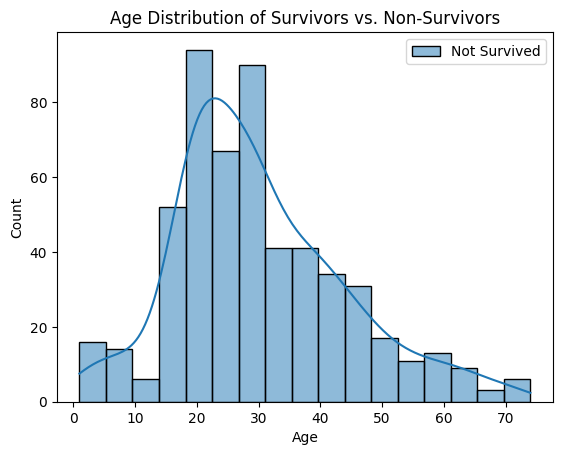

In [113]:
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, label="Not Survived")
plt.legend()
plt.title("Age Distribution of Survivors vs. Non-Survivors")